# Deep learning from scratch
author: Jing Zhang    
e-mail: zhangjingnm@hotmail.com    
date: 2024-08    
reference: https://github.com/oreilly-japan/deep-learning-from-scratch

## Perceptron

### What is a perceptron

![A perceptron](./figures/dlscratch_perceptron.png)    
$
y = 
\begin{cases} 
0 &  (w_1 x_1 + w_2 x_2 \leq \theta), \\
1 &  (w_1 x_1 + w_2 x_2 > \theta).
\end{cases}
$
$x$ is input signal, $y$ is output signal, $w$ is weight, it decides the importance of input signal $x$, $\theta$ is threshold.    
Rewrite into:    
$
y = 
\begin{cases} 
0 & (b+ w_1 x_1 + w_2 x_2 \leq 0), \\
1 & (b+ w_1 x_1 + w_2 x_2 > 0).
\end{cases}
$
$b$ is called bias, the value of $b$ decides the neuron is activated easily or not.
### Simple logic circuit

![AND gate](./figures/dlscratch_andgate.png) ![NOTAND gate](./figures/dlscratch_notandgate.png) ![OR gate](./figures/dlscratch_orgate.png) ![XOR gate](./figures/dlscratch_xorgate.png)

In [6]:
# AND gate
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


print('(x1,x2) -> y\nAND gate')
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(x1,x2) -> y
AND gate
(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [8]:
# NOTAND gate
import numpy as np

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print('(x1,x2) -> y\nNOTAND gate')
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(x1,x2) -> y
NOTAND gate
(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


Single linear    
![OR gate](./figures/dlscratch_orgatecor.png)    
A **linear** line can separate $\triangle$ and $\bigcirc$ in OR gate

In [10]:
# OR gate
import numpy as np

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([1, 1])
    b = -0.5
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print('(x1,x2) -> y\nOR gate')
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(x1,x2) -> y
OR gate
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


### Multiple layer perceptron

![OR gate](./figures/dlscratch_xorgatecor.png) ![XOR gate](./figures/dlscratch_xorgateco.png) ![Multi-layer perceptrion](./figures/dlscratch_perceptronmulti.png)    
A **non-linear** line can separate $\triangle$ and $\bigcirc$ in XOR gate    


In [11]:
# XOR gate
def XOR(x1, x2):
    # overlay different perceptrons like lego
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print('(x1,x2) -> y\nXOR gate')
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(x1,x2) -> y
XOR gate
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## Neural networks

### From perceptron to neural networks
A first look at neural network diagram    
![A neural network](./figures/dlscratch_nn.png)    
Review a perceptron:    
![A perceptron](./figures/dlscratch_perceptronbias.png) $
y = 
\begin{cases} 
0 & (b+ w_1 x_1 + w_2 x_2 \leq 0), \\
1 & (b+ w_1 x_1 + w_2 x_2 > 0).
\end{cases}
$
$b$ is called bias, the value of $b$ decides the neuron is activated easily or not.     
Rewrite into: $y=h(b+w_1 x_1 + w_2 x_2)$ and $
h(x) = 
\begin{cases} 
0 & (x \leq 0), \\
1 & (x > 0).
\end{cases}
$

$h(x)$ is
 called **activation function**, to be specific, rewrite the function above as: $a=b+w_1 x_1 + w_2 x_2$ and $y=h(a)$, a diagram shows below:    
![A perceptron](./figures/dlscratch_perceptronbiasact.png) 




### Activation functions
#### Sigmoid function
$$ h(x)=\frac{1}{1+e^{-x}}  $$


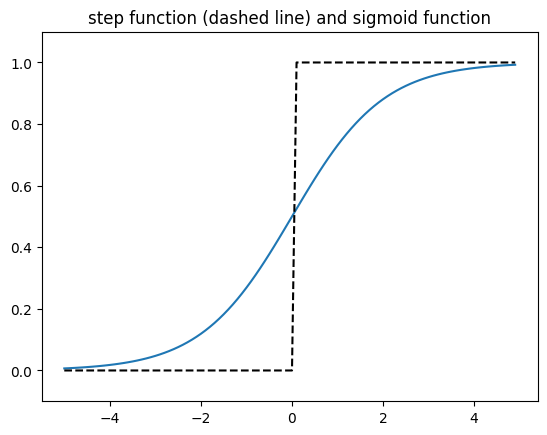

In [15]:
# step function and sigmoid function
import numpy as np
import matplotlib.pylab as plt

# sigmoid function is used in neural networks, for smooth change
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# step function is used in perceptron, for rapid signal changes
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) 
plt.title('step function (dashed line) and sigmoid function')
plt.show()

#### ReLU function
$$
h(x) = 
\begin{cases} 
0 & (x \leq 0), \\
x & (x > 0).
\end{cases}
$$

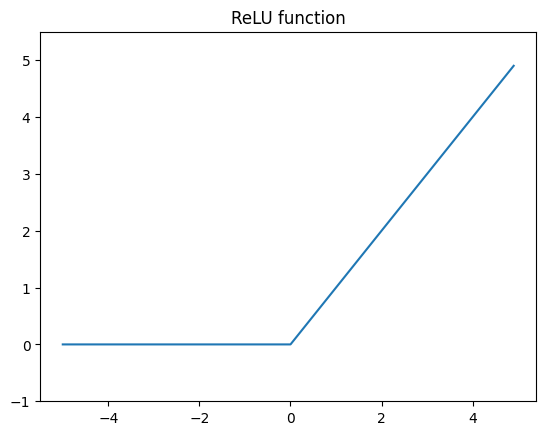

In [16]:
# ReLU function
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.title('ReLU function')
plt.show()

### Multidimensional arrays
The number of columns of first array should be same as the the number of rows of second array.    
For example: (3x2)*(2x4)=3x4

In [41]:
import numpy as np 
# one dimension array
A = np.array([1, 2, 3, 4])
print(f'array A: {A} \nA.ndim: {A.ndim} A.shape: {A.shape} A.shape[0]: {A.shape[0]}')
# two dimension array (matrix)
B = np.array([[1,2], [3,4], [5,6]])
print(f'array B:\n {B}\nB.ndim: {B.ndim} B.shape: {B.shape} B.shape[0]: {B.shape[0]} B.shape[1]: {B.shape[1]}\n')

# multiply or dot
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
print(f'Matrix dot product\n A.shape {A.shape} B.shape {B.shape} \ndot(A,B).shape {np.dot(A,B).shape}\n \
np.dot(A,B)\n {np.dot(A,B)} \nnp.dot(B,A)\n {np.dot(B,A)} \ndot(B,A).shape {np.dot(B,A).shape}')

array A: [1 2 3 4] 
A.ndim: 1 A.shape: (4,) A.shape[0]: 4
array B:
 [[1 2]
 [3 4]
 [5 6]]
B.ndim: 2 B.shape: (3, 2) B.shape[0]: 3 B.shape[1]: 2

Matrix dot product
 A.shape (2, 3) B.shape (3, 2) 
dot(A,B).shape (2, 2)
 np.dot(A,B)
 [[22 28]
 [49 64]] 
np.dot(B,A)
 [[ 9 12 15]
 [19 26 33]
 [29 40 51]] 
dot(B,A).shape (3, 3)


Dot product of a neural networks    
![dot product of a neural networks](./figures/dlscratch_nndot.png)    


In [43]:
# a one layer neural network
X = np.array([1, 2]) # input elements
W = np.array([[1, 3, 5], [2, 4, 6]]) # weights of each element
Y = np.dot(X, W) # output
print(Y)

[ 5 11 17]


### A 3-layer neural networks

![From input to 1st layer](./figures/dlscratch_nn3layer1.png)
From input to 1st layer    
![From 1st to 2nd layer](./figures/dlscratch_nn3layer2.png)
From 1st to 2nd layer    
![From 2nd to output layer](./figures/dlscratch_nn3layer3.png)
From 2nd to output layer

In [2]:
import numpy as np

def init_network():
    network = {} # a dictionary including keys such as weights and bias
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def identity_function(x):
    # used for regression
    return x

def sigmoid(x):
    # used for binary classification
    return 1 / (1 + np.exp(-x))

def forward(network, x):
    # x is input elements
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


### Output layer

Regression problem uses idendity function;    
Classification problem uses softmax function, output becomes probability, sum is 1. Because softmax funciton doesn't change output distribution, sometimes softmax function can be neglected in classification problem so that less computation time and memory.
$$y_k = \frac{e^{a_k}}{\sum_{i=1}^n e^{a_i}}$$

The number of output layer depends on tasks, for instance, number classification has 10 classes, gender classification has 2 classes in general (here we don't consider LBGTQ~)

In [16]:
# softmax function
import numpy as np

a = np.array([0.3, 2.9, 901.0])
print(f'array a {a}')
exp_a = np.exp(a)
print(f'exp of a {exp_a}')
sum_exp_a = np.sum(exp_a)
print(f'sum_exp_a {sum_exp_a}')
y = exp_a / sum_exp_a
print(f'y {y}')

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # avoid overflow
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
print(f'softmax(a) after overflow preventing {softmax(a)}')

array a [3.00e-01 2.90e+00 9.01e+02]
exp of a [ 1.34985881 18.17414537         inf]
sum_exp_a inf
y [ 0.  0. nan]
softmax(a) after overflow preventing [0. 0. 1.]


C:\Users\zhang\AppData\Local\Temp\ipykernel_31224\3256760056.py:6: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\zhang\AppData\Local\Temp\ipykernel_31224\3256760056.py:10: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


### Handwritten digital number recognition

x_train.shape (60000, 784) y_train.shape (60000,) x_test.shape (10000, 784) y_test.shape (10000,)
img.shape (784,) label 5
img.shape after reshape (28, 28)


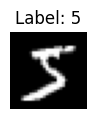

In [36]:
import sys, os
sys.path.append(os.pardir)  # Settings for importing files from a parent directory
import numpy as np
from dataset.mnist import load_mnist

# load dataset
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False)

# show dataset info
print(f'x_train.shape {x_train.shape} y_train.shape {y_train.shape} x_test.shape {x_test.shape} y_test.shape {y_test.shape}') 

# show one image and label
img = x_train[0]
label = y_train[0]
print(f'img.shape {img.shape} label {label}')  # (784,) 5

img = img.reshape(28, 28)  
print(f'img.shape after reshape {img.shape}')  # (28, 28)

plt.figure(figsize=(1, 1)) # inch
plt.imshow(img, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off') 
plt.show()

In [37]:
import sys, os
sys.path.append(os.pardir) # Settings for importing files from a parent directory
import numpy as np
import pickle # used to save object into a file, or vice versa
from dataset.mnist import load_mnist

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # avoid overflow
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # Get the index of the most probable element
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [41]:
# shape check
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(f'X {x[0].shape} -> W1 {W1.shape} -> W2 {W2.shape} -> W3 {W3.shape} -> y {y.shape}')

X (784,) -> W1 (784, 50) -> W2 (50, 100) -> W3 (100, 10) -> y (10,)


Batch processing

In [43]:
import sys, os
sys.path.append(os.pardir)  # Settings for importing files from a parent directory
import numpy as np
import pickle
from dataset.mnist import load_mnist


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # axis = 0 is column, 1 is row, here y_batch (100, 10), means take the max value in each row
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # is same, return true, or return false, then sum the number of trues

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


In [46]:
# shape check
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(f'x_batch {x_batch.shape} -> W1 {W1.shape} -> W2 {W2.shape} -> W3 {W3.shape} -> y_batch {y_batch.shape}')

x_batch (100, 784) -> W1 (784, 50) -> W2 (50, 100) -> W3 (100, 10) -> y_batch (100, 10)


## Learning neural networks
The "learning" mentioned here refers to the process of automatically obtaining the optimal weight parameters from the training data.
![From human to machine learning to deep learning](./figures/dlscratch_humanmldl.png)

### Learn from data
The neural networks learn from **training data**, to test the **generalization** of model, model test on **test data**, model can hav **over fitting** state if the model behave good only on specific dataset.

### Loss functions
**Loss function** is a index that shows how bad/good a model's performance is.
For example, **mean squared error**:
$$ E = \sum_k(y_k-t_k)^2 $$
$y$ is output of model, $t$ is labeled data, $k$ is dimension, for instance, $k=10$ in digital number    
**Cross entropy error** is defined as:
$$E=-\sum_k t_k \log y_k$$
mean that the higher prediction, the lower the cross entropy error.

Why need loss funcion    
* The aim is to find best weights of neural networks automatically.
* The recognition accuracy has little response to small parameter changes. Even if it does, its value changes discontinuously and suddenly.
* Instead of accuracy, loss changes continuesly.
* Similarly, activation function like step function can not make neural network learn, because most of time it's 0.
* Instead, sigmoid function is smooth, and the gradient is not 0, which is good for model to learn.

In [14]:
# mean squared error for one number
import numpy as np

def mean_squared_error(y, t):
    return np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # one hot label of 2
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # predict probability
error = mean_squared_error(np.array(y), np.array(t)) # error or loss
print(f'mse error {error:.3f} of t {t} and y {y}')
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
error = mean_squared_error(np.array(y), np.array(t))
print(f'mse error {error:.3f} of t {t} and y {y}')
print()
# cross entropy loss for one number
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
error_cel = cross_entropy_error(np.array(y), np.array(t))
print(f'cel loss: {error_cel:.3f} of t {t} and y {y}')
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
error_cel = cross_entropy_error(np.array(y), np.array(t))
print(f'cel loss: {error_cel:.3f} of t {t} and y {y}')


mse error 0.195 of t [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] and y [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mse error 1.195 of t [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] and y [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cel loss: 0.511 of t [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] and y [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cel loss: 2.303 of t [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] and y [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]


batch based loss
$$E=-\frac{1}{N}\sum_n\sum_k t_{nk} \log y_{nk}$$
$N$ is the batch size

In [29]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)
print(f'x_train.shape {x_train.shape} t_train.shape {t_train.shape}') # (60000, 784) (60000, 10)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # random pick 10 numbers in training set
print(f'batch mask {batch_mask}')
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

# cross entropy error for batch number, one-hot label
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

# cross entropy error for batch number, non one-hot label
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# explain for np.log(y[np.arange(batch_size), t] + 1e-7)
batch_size = 5
np.arange(batch_size)

# t ensures that only correct class probability values ​​are used in the calculation.
t = [2,7,0,9,4] # non one-hot label
y = np.array([
    [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
    [0.1, 0.05, 0.0, 0.0, 0.05, 0.1, 0.0, 0.1, 0.6, 0.0],
    [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],
    [0.1, 0.05, 0.0, 0.0, 0.05, 0.1, 0.6, 0.1, 0.0, 0.0],
    [0.1, 0.05, 0.1, 0.0, 0.55, 0.1, 0.0, 0.1, 0.0, 0.0]
])  # predictions from model

print(f'\nnp.arange(batch_size) {np.arange(batch_size)} \n\t\t    t {t}')

coordinates = [f'y[{i},{t[i]}]' for i in range(batch_size)]
print(f'\ncoordinates {coordinates}')

print(f'y = np.array shape {y.shape} \n{y}')
print(f'\ny[np.arange(batch_size),t] {y[np.arange(batch_size), t]}')

x_train.shape (60000, 784) t_train.shape (60000, 10)
batch mask [45175 41462 47670 47477  3560 55597 23771  6682 47686 41518]

np.arange(batch_size) [0 1 2 3 4] 
		    t [2, 7, 0, 9, 4]

coordinates ['y[0,2]', 'y[1,7]', 'y[2,0]', 'y[3,9]', 'y[4,4]']
y = np.array shape (5, 10) 
[[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]
 [0.1  0.05 0.   0.   0.05 0.1  0.   0.1  0.6  0.  ]
 [0.1  0.05 0.1  0.   0.05 0.1  0.   0.6  0.   0.  ]
 [0.1  0.05 0.   0.   0.05 0.1  0.6  0.1  0.   0.  ]
 [0.1  0.05 0.1  0.   0.55 0.1  0.   0.1  0.   0.  ]]

y[np.arange(batch_size),t] [0.6  0.1  0.1  0.   0.55]


### Numerical differentiation
Two ways of calculating the derivative of a function:    
1. **Numerical differentiation** is the process of using numerical methods to approximate the derivative of a function.
2. **Analytic differentiation**  is the process of using mathematical formulas to calculate the real derivative of a function.

Derivative of a function

$$\frac{\text{d} f(x)}{\text{d} x}=\lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$

![tangent](./figures/dlscratch_tangent.png)

In [3]:
import numpy as np

# a bad example
def numerical_diff(f, x):
    h = 10e-50                 # too small will result in rounding error
    return (f(x+h) - f(x)) / h # the derivative is the slope between (x + h) and x, due to h is not small enough

print(f'np.float32(1e-50): {np.float32(1e-50)}') 

# a revised version
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h) # Central Difference

np.float32(1e-50): 0.0


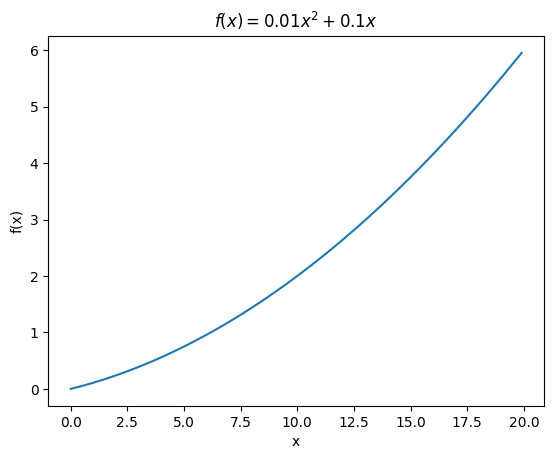

In [8]:
# an example of numerical differential

import numpy as np
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x


x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.title("$f(x) = 0.01x^2+0.1x$")
plt.show()

numerical derivative at x = 5 is 0.1999999999990898, analytic diff is 0.2
numerical derivative at x = 10 is 0.2999999999986347, analytic diff is 0.30000000000000004


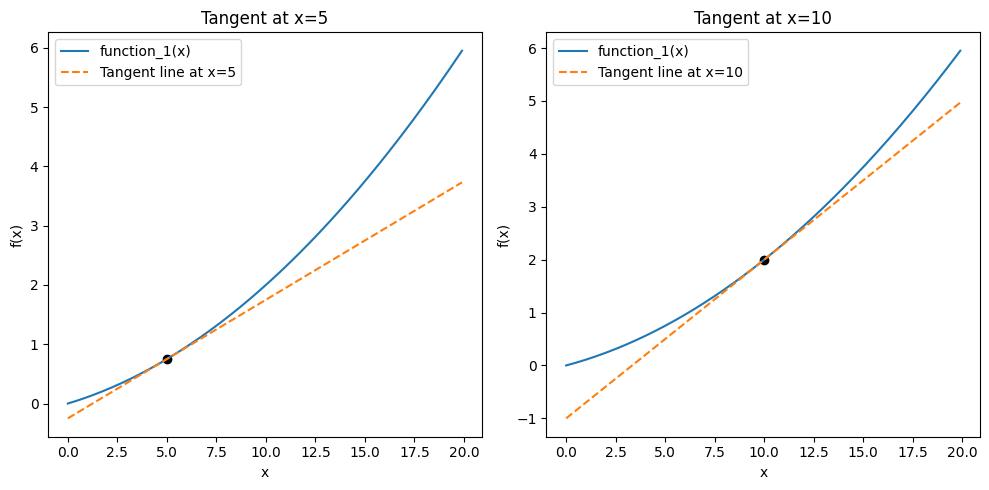

In [19]:
# visualize using numerical differential method
import numpy as np
import matplotlib.pylab as plt

def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x 

def analytic_diff(x):
    return 0.02*x + 0.1

def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

# two values are very close
print(f'numerical derivative at x = 5 is {numerical_diff(function_1, 5)}, analytic diff is {analytic_diff(5)}')
print(f'numerical derivative at x = 10 is {numerical_diff(function_1, 10)}, analytic diff is {analytic_diff(10)}')

# visualize
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) 

x0 = 5
tf_5 = tangent_line(function_1, x0)
y2_5 = tf_5(x)

plt.plot(x, y, label="function_1(x)")
plt.plot(x, y2_5, label="Tangent line at x=5", linestyle='--')
plt.scatter(x0, function_1(x0), color='black')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Tangent at x=5")

plt.subplot(1, 2, 2)

x1 = 10
tf_10 = tangent_line(function_1, x1)
y2_10 = tf_10(x)

plt.plot(x, y, label="function_1(x)")
plt.plot(x, y2_10, label="Tangent line at x=10", linestyle='--')
plt.scatter(x1, function_1(x1), color='black') 
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Tangent at x=10")

plt.tight_layout()
plt.show()

Partial derivatives

The **partial derivatives** of function $f(x_0,x_1)=x_0^2+x_1^2$ is $\frac{\partial{f}}{\partial{x_0}}$ and $\frac{\partial{f}}{\partial{x_1}}$. Calculating partial derivatives is the same as derivatives (using numerical differential method), but partial derivatives require setting one of the multiple variables as the target variable and fixing the other variables to certain values.

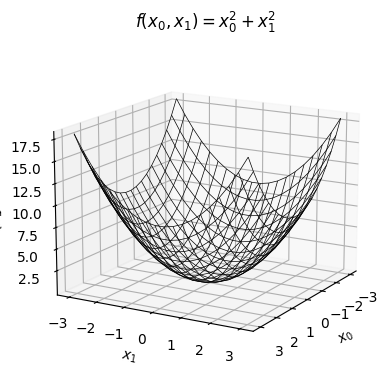

In [60]:
# visualize a multi variable function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def function_2(x0, x1):
    return x0**2 + x1**2

x0 = np.linspace(-3, 3, 20)
x1 = np.linspace(-3, 3, 20)
x0, x1 = np.meshgrid(x0, x1)

z = function_2(x0, x1)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x0, x1, z, color='black', linewidth=0.5)

ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$f(x)$')

ax.dist = 30  # distance，增大可以让图形看起来更远，标签会更清晰
ax.elev = 15  # Adjust elevation 调整仰角
ax.azim = 30  # Adjust the azimuth 调整方位角

ax.set_title('$f(x_0, x_1) = x_0^2 + x_1^2$')
plt.tight_layout()
plt.show()

In [62]:
# calculating partial derivatives of fucntion f = x0**2 + x1**2

import numpy as np

# need to fix one variable
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(f'numerical_diff(function_tmp1, 3.0) {numerical_diff(function_tmp1, 3.0)}')
print(f'numerical_diff(function_tmp2, 4.0) {numerical_diff(function_tmp2, 4.0)}')

numerical_diff(function_tmp1, 3.0) 6.00000000000378
numerical_diff(function_tmp2, 4.0) 7.999999999999119


### Gradient
**Graidient** is to calculate all the $(\frac{\partial{f}}{\partial{x_0}},\frac{\partial{f}}{\partial{x_1}})$

The gradient indicates the direction in which the function value rises fastest, while the negative gradient indicates the direction in which the function value decreases fastest. The negative gradient direction plays a key role in many optimization algorithms, especially when you need to minimize a function (such as a loss function).

In [63]:
import numpy as np

# single variable
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

# multi variables, x is an array
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

print(f'numerical_gradient(function_2, np.array([3.0, 4.0])) {numerical_gradient(function_2, np.array([3.0, 4.0]))}')
print(f'numerical_gradient(function_2, np.array([0.0, 2.0])) {numerical_gradient(function_2, np.array([0.0, 2.0]))}')
print(f'numerical_gradient(function_2, np.array([3.0, 0.0])) {numerical_gradient(function_2, np.array([3.0, 0.0]))}')

numerical_gradient(function_2, np.array([3.0, 4.0])) [6. 8.]
numerical_gradient(function_2, np.array([0.0, 2.0])) [0. 4.]
numerical_gradient(function_2, np.array([3.0, 0.0])) [6. 0.]


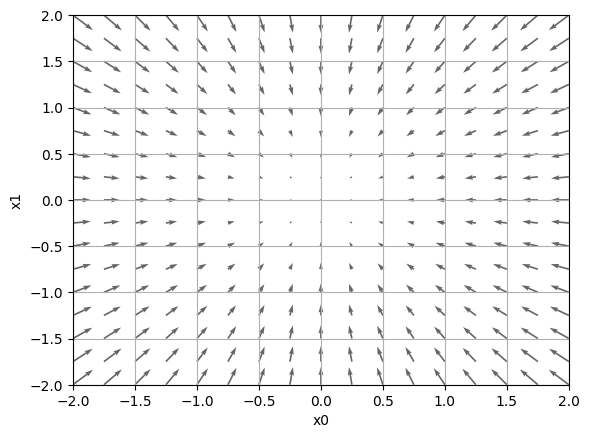

In [65]:

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # restore the value
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    # The vector field shows the direction of descent of the function (use -grad to indicate negative gradient, i.e. descent direction).
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666") # Represents the gradient direction and magnitude of each point
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

Gradient descent method    
Along the direction of gradient descent, it is possible to find the place where the function (loss function in DL) value is minimum. The mathematic definition is (say 2 variables):    
$$x_0 = x_0-\eta\frac{\partial f}{\partial x_0}\\
  x_1 = x_1-\eta\frac{\partial f}{\partial x_1}$$    
$\eta$ is update quantity, in neural network learning, it's called learning rate.

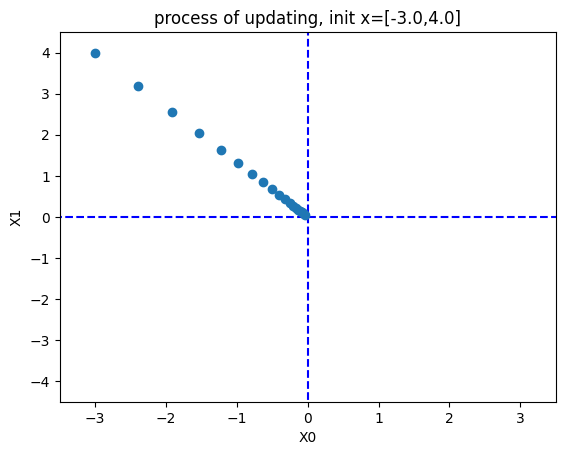

In [69]:
# implemention of gradient descent

import numpy as np

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

# an example for calculating minimum value of function using gradient descent
import matplotlib.pylab as plt

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.title('process of updating, init x=[-3.0,4.0]')
plt.show()

In [73]:
# what if the learning rate is too large or too small

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

init_x = np.array([-3.0, 4.0])
print(f'gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100) {gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)}')
init_x = np.array([-3.0, 4.0])
print(f'gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100) {gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)}')


gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100) [-2.58983747e+13 -1.29524862e+12]
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100) [-2.99999994  3.99999992]


Gradient of a neural network    
To find the best weights of neural network, we need a loss function, so solve a loss function, we need calculate graident.    
$$ 
W = 
\begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
\end{pmatrix}
 $$
$$ 
\frac{\partial L}{\partial W} = 
\begin{pmatrix}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} \\
\end{pmatrix}
 $$

 ![dot product of a neural networks](./figures/dlscratch_nndot.png)    


In [86]:
# implement a simple net as figure above
import numpy as np

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # If the training data is one-hot vector, convert it to the index of the correct label    
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # restore the value
        it.iternext()

    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # randomly generate 6 weights

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9]) # input
t = np.array([0, 0, 1])  # label

net = simpleNet()
print(f'weights: \n{(net.W)}')
p = net.predict(x)
print(f'prediction: {p}\nargmax: {np.argmax(p)}')
print(f'label:{t}')
print(f'loss: {net.loss(x, t)}')
f = lambda w: net.loss(x, t) # define a lambda function called f, return loss value, instead of def f():...
dW = numerical_gradient(f, net.W)

print(f'numerical_gradient of weights:\n{dW}')

# from result of numerical_gradient of weights, 0.4266314 means the weight should update as negative direction;
# -0.5378735 means the weight shoud update as positive direction, and it has more contribution than 0.4266314,

weights: 
[[ 0.29112548  0.17544122  0.78346029]
 [-0.42122279 -1.83806798 -0.93167024]]
prediction: [-0.20442522 -1.54899645 -0.36842704]
argmax: 0
label:[0 0 1]
loss: 0.9104012868710342
numerical_gradient of weights:
[[ 0.28444209  0.07414024 -0.35858233]
 [ 0.42666314  0.11121036 -0.5378735 ]]


### Steps for implementing a neural network
1. **mini-batch**: randomly select a batch data to train, the goal is to reduce the loss value from these batch data.    
2. **gradient**: calculate graident, the goal is to reduce the loss value.    
3. **update weights**: update weights along the direction of gradient descent.
4. Repeat the above steps.


In [94]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()   
        
    return grad

class TwoLayerNet:
    ''' 
    variables: params(weights); grads
    functions: __init__(self,input_size, hidden_size, output_size)
    predict(self, x)
    accuracy(self, x, t)
    loss(self, x, t)
    numerical_gradient(self, x, t)
    '''
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # initionalize weights
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def compute_numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

Epoch 1/1 - train acc: 0.1044, test acc: 0.1028


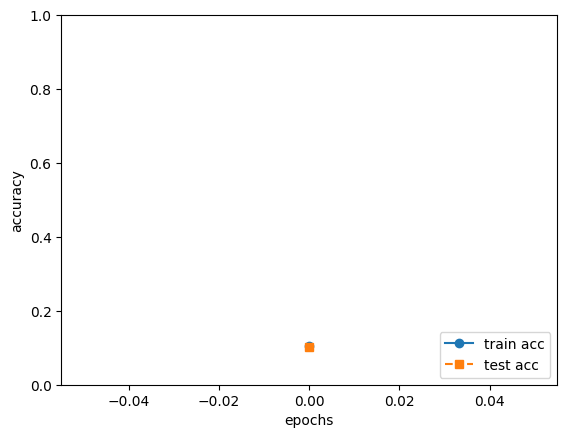

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# Load MNIST data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# Initialize the network
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# Hyperparameters
epochs = 1  # Set the number of epochs
train_size = x_train.shape[0] - 59000  # Training set size (1000 samples)
batch_size = 100  # batch size
learning_rate = 0.1

# Initialize lists to store training results
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = train_size // batch_size

# Training loop
# one epoch trains all training data
for epoch in range(epochs):
    # one iteration trains a batch data
    for i in range(iter_per_epoch):
        # Select a random mini-batch
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        # Calculate the gradient
        grad = network.compute_numerical_gradient(x_batch, t_batch)
        
        # Update the parameters
        for key in ('W1', 'b1', 'W2', 'b2'):
            network.params[key] -= learning_rate * grad[key]
        
        # Calculate the loss for the current batch
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)
    
    # At the end of each epoch, calculate and record the training and testing accuracy
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} - train acc: {train_acc:.4f}, test acc: {test_acc:.4f}")

# Visualize the results
plt.plot(np.arange(epochs), train_acc_list, label='train acc', marker='o')
plt.plot(np.arange(epochs), test_acc_list, label='test acc', linestyle='--', marker='s')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
# Guess why I only run one epoch? -- Because it's too slow!

## Back propagation

### Computational graph
![Computational graph](./figures/dlscratch_computegraph.png)    
The total consumption is calculated from left to right, this process is called **forward propagation**, correspondingly, there is **back propagation**, which is used in *derivative computation*.

### Chain rule
* Chain rule is used to calculate derivative of functions.
* Chain rule is used in **Composite Functions**, for example: $$z=t^2\\ t=x+y$$
* The derivative of composite functions can be presented as the product of the derivatives of each function, for example: $$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t}\frac{\partial t}{\partial x}$$

Therefore, $\frac{\partial z}{\partial t}=2t$, $\frac{\partial t}{\partial x}=1$ (analytic derivative)
$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t}\frac{\partial t}{\partial x}=2t\cdot 1=2(x+y)$$

The chain rule is shown as computational graph:    
![chain rule in computational graph](./figures/dlscratch_computegraphchainrule.png) ![chain rule in computational graph](./figures/dlscratch_computegraphchainrule1.png)

### Back propagation

* Back propagation of Addition Nodes    
Take $z=x+y$ as an example, the analytic derivatives of $x$ and $y$ are: 
$$\frac{\partial z}{\partial x} = 1\\ \frac{\partial z}{\partial y} = 1$$
The computational graph of *addition* is as follows:    
![Addition nodes](./figures/dlscratch_computegraphchainruleadd.png)

* Back propagation of Multiplication Nodes
Take $z=xy$ as an example, the analytic derivatives of $x$ and $y$ are: 
$$\frac{\partial z}{\partial x} = y\\ \frac{\partial z}{\partial y} = x$$
The computational graph of *multiplication* is as follows:    
![Product nodes](./figures/dlscratch_computegraphchainruleproduct.png)

### Implemention of a simplelayer
![computegraph](./figures/dlscratch_computegraphapple.png)

In [77]:
# multiply layer and add layer
# an example of buying apples: 
# input: number of apples, unit price of an apple, tax of apples.
# output: total price a customer needs to pay. (forward propagation process)
# gradient of input variables, gradient of output. (back propagation process)
class AddLayer:
    def __init__(self):
        pass
    def forward(self, x, y):
        out = x + y
        return out
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        #print(self.x, self.y)
        return dx, dy

apple_pri = 100
apple_num = 2
tax = 1.1
print(f'intial state:  apple price: {apple_pri}, number of apples: {apple_num}, tax rate of an apple: {tax}\n')

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
print('forward propagation:\n')
price_notax = mul_apple_layer.forward(apple_pri, apple_num) # Calculate the total price excluding tax
price_tax = mul_tax_layer.forward(price_notax, tax)         # Calculate the total price including tax
print(f"price of apples before tax: {int(price_notax)}\nprice of apples after tax: {int(price_tax)}")

# backward
print('\nback propagation:\n')
d_price = 1 # Changes in prices, quantities, and tax rates
dapple_price, dtax = mul_tax_layer.backward(d_price) # dapple_price, dtax are middel gradients
dapple, dapple_num = mul_apple_layer.backward(dapple_price) # chain rule is used
print(f'influence of changement of price, number and tax on total price:')
print(f'when tax rate increases {d_price},    you will pay more {dtax}')
print(f'when # of apples increase {d_price},  you will pay more {int(dapple_num)}')
print(f'when apple price increases {d_price}, you will pay more {dapple}')

intial state:  apple price: 100, number of apples: 2, tax rate of an apple: 1.1

forward propagation:

price of apples before tax: 200
price of apples after tax: 220

back propagation:

influence of changement of price, number and tax on total price:
when tax rate increases 1,    you will pay more 200
when # of apples increase 1,  you will pay more 110
when apple price increases 1, you will pay more 2.2


In [88]:
# add one mor fruit -- oranges
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1
print(f'intial state:  apple price: {apple}, number of apples: {apple_num}, orange price: {orange}, number of oranges: {orange_num}, tax rate of an apple: {tax}\n')

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
print('forward propagation:\n')
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)
print(f"before tax: price of apples {int(apple_price)} orange_price {orange_price} all_price {all_price}  after tax: total price: {int(price)}")

# backward
print('\nback propagation:\n')
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print(f'influence of changement of price, number and tax on total price:')
print(f'when tax rate increases {d_price},    you will pay more {dtax}')
print(f'when # of apples increase {d_price},  you will pay more {int(dapple_num)}')
print(f'when # of oranges increase {d_price},  you will pay more {int(dorange_num)}')
print(f'when apple price increases {d_price}, you will pay more {dapple}')
print(f'when orange price increases {d_price}, you will pay more {dorange}')

intial state:  apple price: 100, number of apples: 2, orange price: 150, number of oranges: 3, tax rate of an apple: 1.1

forward propagation:

before tax: price of apples 200 orange_price 450 all_price 650  after tax: total price: 715

back propagation:

influence of changement of price, number and tax on total price:
when tax rate increases 1,    you will pay more 650
when # of apples increase 1,  you will pay more 110
when # of oranges increase 1,  you will pay more 165
when apple price increases 1, you will pay more 2.2
when orange price increases 1, you will pay more 3.3000000000000003


### Activation function in back propagation
Why need activation function, after back propagation (calculating gradient/derivative process), you may be clear. If no activation function:    
1. Linear superposition: The output of each layer is the product of the input and the weight matrix plus the bias. Since there is no activation function to introduce nonlinearity, the output of the entire network will only be a series of linear transformations of the input.
2. Gradient vanishing or exploding: In a multi-layer network, if each layer is linear, the gradients are continuously multiplied during back propagation. If the norm of the weight matrix is ​​greater than 1, the gradient may grow exponentially (gradient explosion), while if the norm of the weight matrix is ​​less than 1, the gradient may decay exponentially (gradient vanishing). This makes weight updates very difficult, thus hindering the training of deep networks.
3. Gradient Constant: In the absence of an activation function, the gradient of each layer will be constant because the derivative of a linear layer is a constant. This means that the gradient will not change as the depth of the network increases, but it also means that the gradients cannot be propagated effectively because they will not be adjusted for different layers of the network.
4. Lack of feature learning ability: Activation functions usually help the network learn useful feature representations from the input data. Without activation functions, the network will not be able to do this feature learning because it can only perform simple linear transformations.

ReLU and Sigmoid    
* ReLU（Rectified Linear Unit)    
$$
y = 
\begin{cases} 
x & (x > 0), \\
0 & (x \leq 0).
\end{cases}
$$
the analytic derivative:
$$
\frac{\partial y}{\partial x} = 
\begin{cases} 
1 & (x > 0), \\
0 & (x \leq 0).
\end{cases}
$$
computational graph of ReLU function    
![computational graph](./figures/dlscratch_computegraphrelu.png)

* Sigmoid:    
$$y=\frac{1}{1+\exp(-x)}$$
the analytic derivative:
$$\frac{\partial y}{\partial x} = y(1-y)$$
computational graph of Sigmoid function, a bit complicated, let's first look at forward progation, which is easy to understand    
![computational graph of sigmoid](./figures/dlscratch_computegraphsigmoid.png)    
computational graph of Sigmoid function in back propagation, difficult to understand unless some analytic derivative is recalled     
![computational graph of sigmoid](./figures/dlscratch_computegraphsigmoidback.png)    
1. '/' means $y=\frac{1}{x}$, so its analytic derivative is: $\frac{\partial y}{\partial x}=-\frac{1}{x^2}=-y^2$
2. '+' will keep unchanged (e.g. $z=x+y$)
3. 'exp' means $y=e^x$, so its analytic derivative is still: $\frac{\partial y}{\partial x}=e^x \text{or} \exp (x)$, in this case, $\exp (-x)$
4. '×' will exchange the variable (e.g. $z=xy$), so here multiply by -1

Simplified version    
![computational graph of sigmoid](./figures/dlscratch_computegraphsigmoidbacksimple.png)  ![computational graph of sigmoid](./figures/dlscratch_computegraphsigmoidbacksimple1.png)    
Because Sigmoid function is $y = \frac{1}{1+\exp(-x)}$, so the final formula is shown as follow:
$$\frac{\partial L}{\partial y} y^2 \exp(-x) 
= \frac{\partial L}{\partial y} \frac{1}{(1 + \exp(-x))^2} \exp(-x) 
= \frac{\partial L}{\partial y} \frac{1}{1 + \exp(-x)} \frac{\exp(-x)}{1 + \exp(-x)} 
= \frac{\partial L}{\partial y} y(1-y)
$$
* The above formula is the Derivative of loss function $L$ with respect to $y$ and The derivative of the activation function $y$ with respect to the input $x$
* Intuitively, the derivative of the sigmoid function tells us that when the input $x$ is very large or very small, the derivative becomes very small (the gradient vanishing problem), and when the input $x$ is close to 0, the derivative is the largest, which helps the model update the weights during training.

In [89]:
import numpy as np

class Relu:
    def __init__(self):
        self.out = None  # save output of forward
    def forward(self, x):
        self.out = np.maximum(0, x)
        return self.out
    def backward(self, dout):
        dx = dout * (self.out > 0)
        return dx

class Sigmoid:
    def __init__(self):
        self.out = None
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out
    def backward(self, dout):
        # output*y*(1-y)
        dx = dout * self.out * (1.0 - self.out)
        return dx

Softmax with loss    
The derivative after back propagation of cross entropy loss and softmax function look beautiful, clean, and very intuitive (shows difference bewteen output and label), why?    
![crossentropylayer](./figures/dlscratch_computegraphcrossentropy.png)    
Beause:    
* Softmax function $y_i=\frac{\exp(a_i)}{\sum_j\exp(a_j)}$, derivative is $\frac{\partial y_i}{\partial a_i}=y_i(1-y_i)$
* Cross entropy loss $L = -\sum_i t_i\log(y_i)$, derivative is $\frac{\partial L}{\partial y_i}=-\frac{t_i}{y_i}$
* Derivative of L and Softmax: $\frac{\partial L}{\partial a_i}=\frac{\partial L}{\partial y_i}\cdot\frac{\partial y_i}{\partial a_i}=-\frac{t_i}{y_i}\cdot y_i(1-y_i) = y_i-t_i $

Similary, mean square error loss e $L = \sum_i(t_i-y_i)^2$, derivative is $\frac{\partial L}{\partial y_i}=2(y_i-t_i)$

### Affine transformation
An affine layer is actually a **matrix** of input, weights and bias, nothing new.    
The computational graph below is a batch based affine layer, just to remind that the layer is storing the matrix, not the single elements.    
Many layers in the deep learning library are implemented based on the principle of affine transformation.   
![affinebatch](./figures/dlscratch_computegraphaffinebatch.png)    
So far, we can have a simple network shown as below, affine layer, activation function layer, output layer etc:    
![a simple networkr](./figures/dlscratch_softmaxlayer.png)    

### TwoLayerNet case

In [5]:
import numpy as np
from collections import OrderedDict

class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # Derivatives of weight and bias parameters
        self.dW = None
        self.db = None

    def forward(self, x):
        # Tensor support
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b # out=x⋅W+b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0) # out = wx+b, biases have same influence on all x
        
        dx = dx.reshape(*self.original_x_shape) # Reshape input data (tensor compatible)
        return dx
    
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # Softmax output
        self.t = None # labeled data

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        # When the label is one-hot vector
        if self.t.size == self.y.size: 
            dx = (self.y - self.t) / batch_size # y-t
        # when the label is integer
        else:
            dx = self.y.copy() # y not change
            dx[np.arange(batch_size), self.t] -= 1 # y-t, in this case, the true label t=1
            dx = dx / batch_size
        
        return dx

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # If the training data is one-hot vector, convert it to the index of the correct label    
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()   
        
    return grad

class Relu:
    def __init__(self):
        self.out = None  # save output of forward
    def forward(self, x):
        self.out = np.maximum(0, x)
        return self.out
    def backward(self, dout):
        dx = dout * (self.out > 0)
        return dx

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # initionalize weights
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # Creating layers
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lossLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    def loss(self, x, t):
        y = self.predict(x)
        return self.lossLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def compute_numerical_gradient(self, x, t):
        # forward
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def backward_gradient(self, x, t):
        # forward
        y = self.predict(x)
        self.lossLayer.forward(y, t) # loss value is stored
        
        # backward
        dout = 1 # inital gradient of loss
        dout = self.lossLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse() # back propagation start from last layer
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

Epoch 1/10 - train acc: 0.1988, test acc: 0.2030
Epoch 2/10 - train acc: 0.1126, test acc: 0.1139
Epoch 3/10 - train acc: 0.3293, test acc: 0.3260
Epoch 4/10 - train acc: 0.4533, test acc: 0.4442
Epoch 5/10 - train acc: 0.5738, test acc: 0.5800
Epoch 6/10 - train acc: 0.5425, test acc: 0.5475
Epoch 7/10 - train acc: 0.5732, test acc: 0.5756
Epoch 8/10 - train acc: 0.5913, test acc: 0.5891
Epoch 9/10 - train acc: 0.6685, test acc: 0.6704
Epoch 10/10 - train acc: 0.7092, test acc: 0.7108


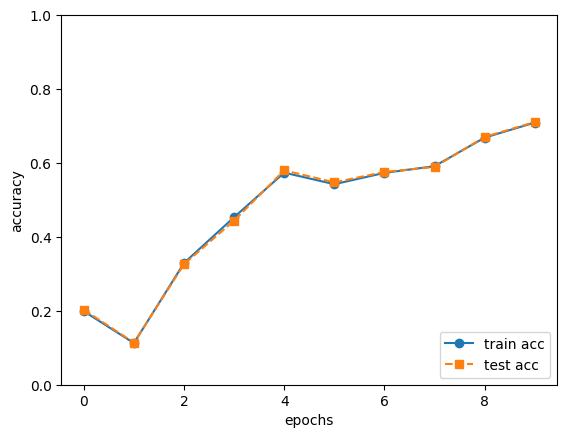

In [6]:
# train model

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# Load MNIST data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# Initialize the network
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# Hyperparameters
epochs = 10  # Set the number of epochs
train_size = x_train.shape[0] - 59000  # Training set size (1000 samples)
batch_size = 100  # batch size
learning_rate = 0.1

# Initialize lists to store training results
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = train_size // batch_size

# Training loop
# one epoch trains all training data
for epoch in range(epochs):
    # one iteration trains a batch data
    for i in range(iter_per_epoch):
        # Select a random mini-batch
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        # Calculate the gradient
        #grad = network.compute_numerical_gradient(x_batch, t_batch) # slow
        grad = network.backward_gradient(x_batch, t_batch) # fast
        
        # Update the parameters
        for key in ('W1', 'b1', 'W2', 'b2'):
            network.params[key] -= learning_rate * grad[key]
        
        # Calculate the loss for the current batch
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)
    
    # At the end of each epoch, calculate and record the training and testing accuracy
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} - train acc: {train_acc:.4f}, test acc: {test_acc:.4f}")

# Visualize the results
plt.plot(np.arange(epochs), train_acc_list, label='train acc', marker='o')
plt.plot(np.arange(epochs), test_acc_list, label='test acc', linestyle='--', marker='s')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [102]:
# gradient check
# the meaning of numerical gradient is to check if the backward propagation is right, although it is very slow.
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.compute_numerical_gradient(x_batch, t_batch) # slow
grad_backprop = network.backward_gradient(x_batch, t_batch) # fast

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:5.044353026635718e-10
b1:2.9569192424975818e-09
W2:5.641680577206034e-09
b2:1.3991489048043038e-07


## Tricks for learning

### Updating parameters (weights&bias)

### Initializing weights

### Batch normalization

### Normalization

### Hyper-parameters

## CNN

## Deep learning